# Experiment 5: Reconstruction Limitations: Number of Views

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("../eval/TestEvaluation/mesh_eval_results.csv")

In [3]:
relevant_models = [
    "vh_1img",
    "vh_2img",
    "vh_3img",
    "vh_4img",
    "vh_5img",
    "vh_6img",
    "pix2vox_aug_1img",
    "pix2vox_aug",
    "pix2vox_aug_3img",
    "pix2vox_aug_4img",
    "pix2vox_aug_5img",
    "pix2vox_aug_6img",
    "pollen_augmentation1",
    "pollen_augmentation2",
    "pollen_augmentation3",
    "pollen_augmentation4",
    "pollen_augmentation5",
    "pollen_augmentation6",
    "refine_p2mpp_augmentation_2_inputs",
    "refine_p2mpp_augmentation_3_inputs",
    "refine_p2mpp_augmentation_4_inputs",
    "refine_p2mpp_augmentation_5_inputs",
    "refine_p2mpp_augmentation_6_inputs",
]

filtered = results[results["model"].isin(relevant_models)]

aggregated = filtered.groupby("model", as_index=False).agg(
    mean_chamfer         = ("chamfer",     "mean"),
    std_chamfer          = ("chamfer",     "std"),
    mean_fscore_1        = ("fscore_1",    "mean"),
    std_fscore_1         = ("fscore_1",    "std"),
    mean_fscore_2_5      = ("fscore_2_5",  "mean"),
    std_fscore_2_5       = ("fscore_2_5",  "std"),
    mean_fscore_5        = ("fscore_5",    "mean"),
    std_fscore_5         = ("fscore_5",    "std"),
    mean_iou             = ("voxel_iou",   "mean"),
    std_iou              = ("voxel_iou",   "std"),
)

aggregated

,model,mean_chamfer,std_chamfer,mean_fscore_1,std_fscore_1,mean_fscore_2_5,std_fscore_2_5,mean_fscore_5,std_fscore_5,mean_iou,std_iou
0,pix2vox_aug,0.059839,0.020741,0.166688,0.060798,0.603350,0.151200,0.848221,0.121432,0.713982,0.176484
1,pix2vox_aug_1img,0.062417,0.019690,0.148271,0.047837,0.576603,0.127046,0.831607,0.114709,0.723872,0.108581
2,pix2vox_aug_3img,0.055425,0.018622,0.178316,0.069002,0.635574,0.142980,0.864877,0.110430,0.738976,0.129375
3,pix2vox_aug_4img,0.057382,0.021190,0.169360,0.069673,0.615489,0.167863,0.855387,0.130177,0.765842,0.093510
4,pix2vox_aug_5img,0.055976,0.016643,0.167743,0.054462,0.612202,0.135544,0.866543,0.101334,0.754659,0.090891
5,pix2vox_aug_6img,0.054871,0.018306,0.176082,0.061838,0.639405,0.138574,0.868861,0.115294,0.746577,0.119281
6,pollen_augmentation1,0.059112,0.011685,0.171571,0.046096,0.612385,0.075098,0.841990,0.076052,0.755112,0.118874
7,pollen_augmentation2,0.043322,0.013381,0.259836,0.088822,0.762052,0.122709,0.909808,0.083156,0.827635,0.065013
8,pollen_augmentation3,0.040660,0.015760,0.285657,0.115463,0.799604,0.153368,0.912250,0.095097,0.836825,0.075932
9,pollen_augmentation4,0.040023,0.014022,0.288918,0.130630,0.787759,0.161595,0.917503,0.078587,0.820266,0.088936


In [25]:
import matplotlib.pyplot as plt
import re

def plot_model_metrics(df, *, title=None):
    """
    Create a 1x3 panel with (1) Chamfer, (2) F-Score @ 1 / 2.5 / 5 %, (3) IoU
    versus the number of input images.

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain columns:
        model, mean_chamfer, std_chamfer, mean_fscore_1, std_fscore_1,
        mean_fscore_2_5, std_fscore_2_5, mean_fscore_5, std_fscore_5,
        mean_iou, std_iou
    title : str, optional
        Figure‑level title; if omitted, the first `model` entry (minus its
        trailing “_Ximg/…”) is used.
    """

    if df.empty:
        raise ValueError("`df` is empty – nothing to plot.")

    # 1. Derive the "# input images" column
    work = (
        df.copy()
          .assign(n_images=df["model"].str.extract(r'(\d+)(?!.*\d)').astype(float))
          .dropna(subset=["n_images"])
          .astype({"n_images": int})
          .sort_values("n_images")
    )

    if work.empty:
        raise ValueError(
            "Could not find an integer suffix in any of the supplied model "
            "names. Check that the model strings end in '_<N>img' or similar."
        )

    # 2. Basic formatting helpers
    if title is None:
        base_name = re.sub(r'[_-]\d+.*$', '', str(work.iloc[0]["model"]))
        title = base_name.replace('_', ' ').title()

    # 3. The figure
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
    fig.suptitle(title)
    
    # (a) Chamfer
    axes[0].errorbar(
        work["n_images"], work["mean_chamfer"], yerr=work["std_chamfer"],
        fmt="o-"
    )
    axes[0].set(
        xlabel="Number of Images",
        ylabel="Chamfer",
        title="Chamfer Distance",
    )
    axes[0].grid(True)

    # (b) F‑Score
    axes[1].errorbar(
        work["n_images"], work["mean_fscore_1"], yerr=work["std_fscore_1"],
        fmt="o-", label="τ = 1%")
    axes[1].errorbar(
        work["n_images"], work["mean_fscore_2_5"], yerr=work["std_fscore_2_5"],
        fmt="s-", label="τ = 2.5%")
    axes[1].errorbar(
        work["n_images"], work["mean_fscore_5"], yerr=work["std_fscore_5"],
        fmt="^-", label="τ = 5%")
    axes[1].set(
        xlabel="Number of Images",
        ylabel="F-Score",
        title="F-Score",
    )
    axes[1].legend()
    axes[1].grid(True)

    # (c) IoU
    axes[2].errorbar(
        work["n_images"], work["mean_iou"], yerr=work["std_iou"],
        fmt="o-"
    )
    axes[2].set(
        xlabel="Number of Images",
        ylabel="IoU",
        title="Voxel IoU",
    )
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()


### Visual Hull

In [26]:
visual_hull = aggregated[aggregated['model'].str.contains("vh_")]

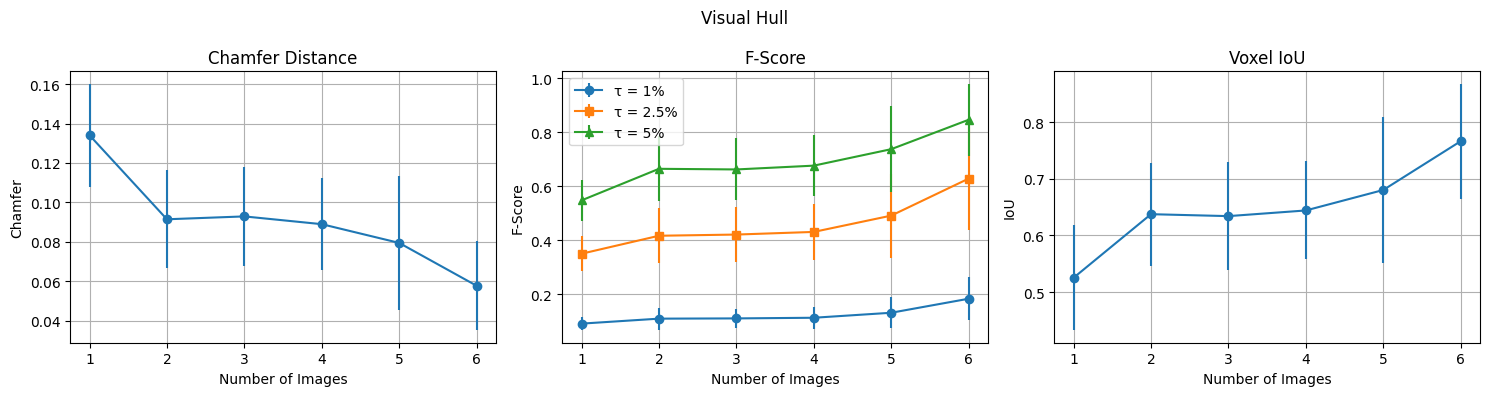

In [27]:
plot_model_metrics(visual_hull, title="Visual Hull")

### Pix2Vox

In [28]:
pix2vox = aggregated[aggregated['model'].str.contains("pix2vox_aug")]

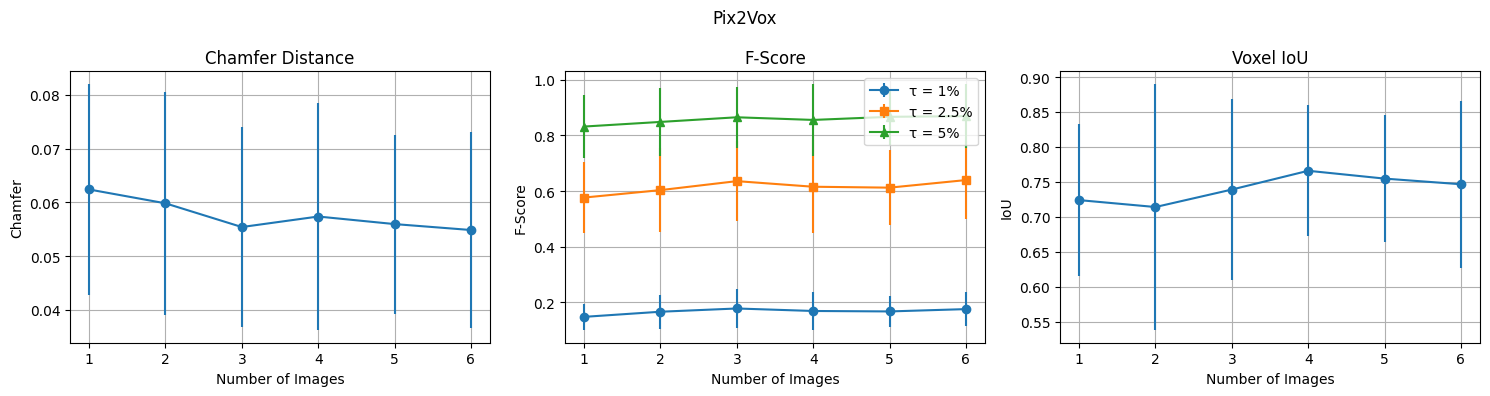

In [29]:
plot_model_metrics(pix2vox, title="Pix2Vox")

### Pixel2Mesh++

In [30]:
pixel2mesh = aggregated[aggregated['model'].str.contains("refine_p2mpp_augmentation")]

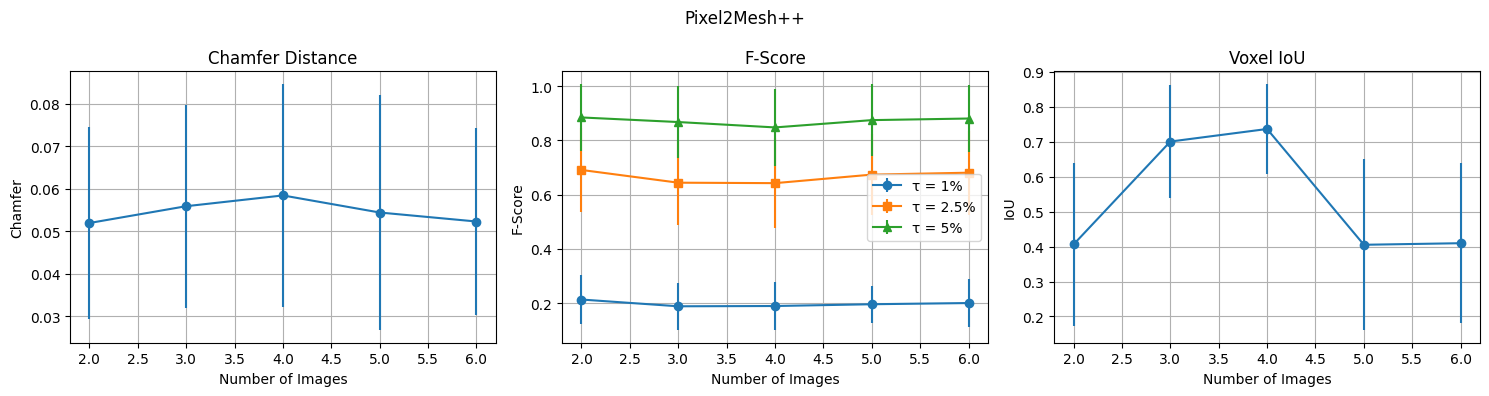

In [31]:
plot_model_metrics(pixel2mesh, title="Pixel2Mesh++")

### PixelNeRF

In [32]:
pixelnerf = aggregated[aggregated['model'].str.contains("pollen_augmentation")]

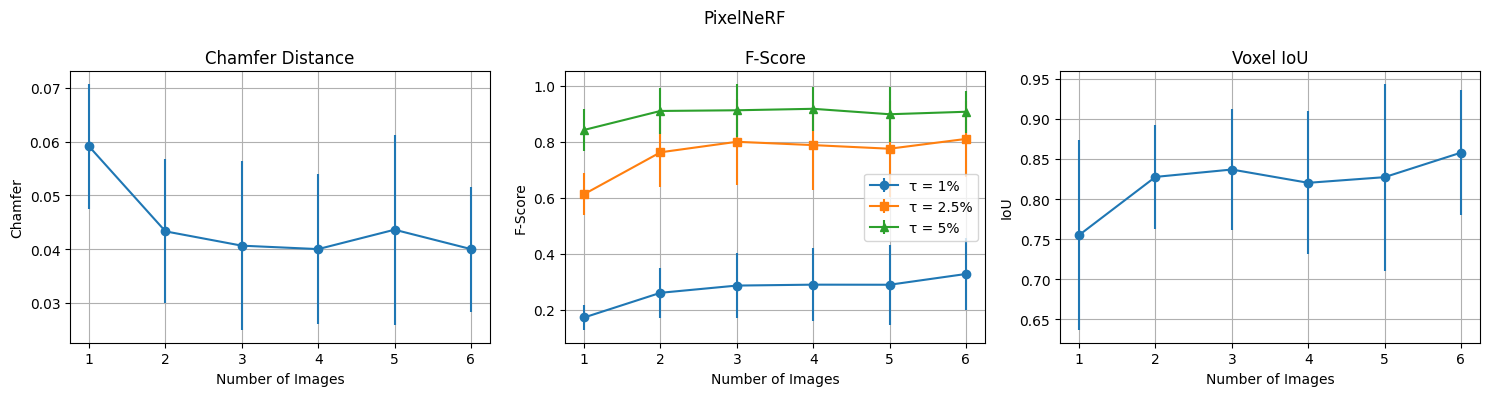

In [33]:
plot_model_metrics(pixelnerf, title="PixelNeRF")